In [3]:
# Use of IPython.display and HTML for using css to format text in Markdown based on
# www.dataquest.io/blog/advanced-jupyter-notebooks-tutorial
from IPython.display import HTML
HTML(
    "<style>\
    span.str {color:#BA2121; font-style:italic; font-weight:bold;}\
    span.num {color:#080; font-style:italic; font-weight:bold;}\
    span.bltn {color:#080; font-weight:bold;}\
    span.op {color:#AA22FF;}\
    span.func {color:#00F;}\
    h3.yt {color:#009900; font-style:italic;}\
    span.yt {color:#009900; font-style:italic;}</style>"
)

<h2><b><u>Case Study: Feed Grain Sector</u></b></h2>

<h3><b><i>Background</i></b></h3>
The feed grains sector is one component of the agricultural sector within the United States. Corn, sorghum, barley, and oats are the four grains that make up the majority of the feed grain sector. Of these four grains, corn accounts for 95% of feed grain production and use in the united States and is used in livestock feed, but also used for fuel ethanol, industrial alcohol, starch, and more [1]. The production and outlook of feed grains affects not only the farmers who grow these crops but also those who use them. The USDA releases monthly reports on the outlook of feed which contains estimates and projections for both domestic and global feed markets [2]. 

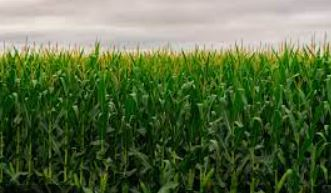

<h3><b><i>Goal</i></b></h3>
The goal of this Case Study is to <b><i>transform, access, summarize, and visualize</i></b> data in different ways using <b><i>pandas</i></b> and based on what you have learned in DataCamp's <a href = "https://learn.datacamp.com/courses/data-manipulation-with-pandas">Data Manipulation with pandas</a> course. In fact, you have already encountered many of the methods you'll need to do this with pandas in previous Case Study Notebooks. In previous Notebooks, the sections were divided to match the topics covered in DataCamp, however in this Case Study instead of having a seperate section for "Transforming Data", in which all you do is transform data, we will make use of the skills you've learned by working with a dataset from scratch. 


<h3><b><i>Data</i></b></h3>
You will work with the United States Department of Agriculture (USDA) Economic Research Service's <a href = "https://www.ers.usda.gov/data-products/feed-grains-database/feed-grains-yearbook-tables/">Feed Grains: Yearbook Tables</a>. The <b><i>Feed Grains: Yearbook Tables</i></b> contain data on the feed grain commodities (corn, barley, sorghum, oats) for a one year time period ranging from 1866-67 to 2021-2022. In this Case Study the <b><i>Feed Grains: Yearbook Tables</i></b> will be abbreviated as the <b><i>Feed Grains dataset</i></b>. 
  
Sources: 
<ol style = "font-size:8px">
    <li>USDA. 2021. Feedgrains sector at a glance. Economic Research Services. https://www.ers.usda.gov/topics/crops/corn-and-other-feedgrains/feedgrains-sector-at-a-glance/</li>
    <li>Mcconnell, Michael and Olga Liefert. 2021. "Feed Outlook: July 2021". USDA:ERS.  https://www.ers.usda.gov/publications/pub-details/?pubid=101631</li>
    <li>USDA.2021. "Feed Grains: Yearbook Tables. https://www.ers.usda.gov/data-products/feed-grains-database/feed-grains-yearbook-tables/</li>
    <li>Image Source: https://commons.wikimedia.org/wiki/File:Agriculture_-_Corn_FIeld_(45691292921).jpg</li>
</ol>



<h4><u>Importing libraries</u></h4>

We'll only be using two libraries in this Case Study, <b><i>NumPy</i></b> and <b><i>pandas</i></b>.

In [4]:
# Import libraries
import numpy as np
import pandas as pd

<h4><u>Reading in the Data</u></h4>

The <b><i>Feed Grains</i></b> data is stored in a <b><i>csv</i></b> file. Read the data into a <b><i>DataFrame</i></b> using pandas <b>read_csv</b> method, then display the first 5 rows of the <b><i>grain_df</i></b> DataFrame. 

In [5]:
# File to read
file_name = "Data/Feed_Grains_Yearbook_Tables-All_Years.csv"

# Read file into pandas DataFrame
grain_df = pd.read_csv(file_name)

# Display the first 5 rows of grain_df
grain_df.head()

,"Table 1--Corn, sorghum, barley, and oats: Planted acreage, harvested acreage, production, yield, and farm price",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Commodity and mkt yr 1/,NaN,Planted acreage (Million acres),Harvested for grain (Million acres),Production (Million bushels),Yield per harvested acre (Bushels per acre),Weighted-average farm price (Million bushels) 2/,Loan rate (dollars per bushel),NaN
1,Corn,1866/67,NaN,30.02,730.81,24.30,0.66,NaN,NaN
2,NaN,1867/68,NaN,32.12,793.91,24.70,0.78,NaN,NaN
3,NaN,1868/69,NaN,35.12,919.59,26.20,0.62,NaN,NaN
4,NaN,1869/70,NaN,35.83,782.08,21.80,0.73,NaN,NaN


<h4><u>Examining the Raw Data</u></h4>

There are several things to notice about the <b><i>grain_df</i></b> DataFrame. 
<ul>
    <li>The table named <b><i>"Table 1"</i></b> was read in as the first column name causing the rest of the columns to be named as <i>"Unamed:#"</i>.</li><br> 
    <li>The <i>Unamed:8 column</i> appears to contain all <b><i>NaN</i></b> values.</li><br>
    <li>The actual column names are stored as the first row of <b><i>grain_df</i></b>.</li><br>
    <li>The original csv file does not repeat the <i>commodity</i> name for each row, it is only included at the first appearance of that particular commodity. For example, <span class="str">"Corn"</span> appears for the first row but does not appear for rows 2-4 even though those rows also correspond to the <span class="str">"Corn"</span>commodity.</li>
</ul>

Let's work on cleaning this data!

<h4><u>Removing Unamed Column 8</u></h4>

Having a column with only <b><i>NaN</i></b> values may be valid for some data sets, however <i>Unnamed: 8</i> does not correspond to any attribute of the <b><i>Feed Grains</i></b> data. Let's double check that the column does not contain any <b><i>NaN</i></b> values by using the <b>isnull</b> function on the values of <i>Unnamed: 8</i> and checking to make sure that all values are return <span class="bltn">True</span> using <b>all</b>. The column is then removed from <b><i>grain_df</i></b> using the <b>drop</b> method. A choice is made to drop the column <b><i>in place</i></b> by setting <b><i>inplace</i></b> <span class="op">=</span> <span class="bltn">True</span>. This means that a new View or DataFrame copy is not returned, but the original <b><i>grain_df DataFrame</i></b> is modified. 

What if you didn't have a way to tell if <i>Unnamed: 8</i> should be removed beforehand? In that case, you could use an <span class="bltn">if</span> statement to only remove the column if <b>all</b> values are <b><i>NaN</i></b>. Let's go ahead and practice using this. 


In [6]:
# Check to make sure the column is all NaN values
if (pd.isnull(grain_df["Unnamed: 8"]).all() == True): 
    # Drop the Unnamed: 8 column 
    grain_df.drop(grain_df.columns[8], axis = 1, inplace = True)

    # Display the result
grain_df.head()

,"Table 1--Corn, sorghum, barley, and oats: Planted acreage, harvested acreage, production, yield, and farm price",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Commodity and mkt yr 1/,NaN,Planted acreage (Million acres),Harvested for grain (Million acres),Production (Million bushels),Yield per harvested acre (Bushels per acre),Weighted-average farm price (Million bushels) 2/,Loan rate (dollars per bushel)
1,Corn,1866/67,NaN,30.02,730.81,24.30,0.66,NaN
2,NaN,1867/68,NaN,32.12,793.91,24.70,0.78,NaN
3,NaN,1868/69,NaN,35.12,919.59,26.20,0.62,NaN
4,NaN,1869/70,NaN,35.83,782.08,21.80,0.73,NaN


The <i>Unnamed: 8</i> column has now been removed from <b><i>grain_df</i></b>. If the Code cell above is rerun a <span class="str">KeyError</span> will occur since the column has been dropped in place. A <i>Unnamed: 8</i> column no longer exists in <b><i>grain_df</i></b> to <b>drop</b>. This is different from previous Case Study Notebooks in which most Code cells could be rerun multiple times. 

There are several other Code cells in this Case Study which modify the <b><i>DataFrame in place</i></b>. If you find you want to repeat a Code cell that has an <b><i>in place</i></b> modification, you will need to rerun previous Code cells to reset the <b><i>DataFrame</i></b> to the state that makes the code in the Code cell you want to repeat valid. 



<h4><u>Removing the Column Names</u></h4>

The next to-do task to get the <b><i>Feed Grains</i></b> data into a usable format is to update the column names. First the attribute names (column names) that came with the data are extracted from the <span class="num">first row</span> of <b><i>grain_df</i></b>. The <span class="num">first two</span> column names are then updated to new values. This is necessary because the column names for the <span class="num">first two columns</span> have been combined into only the name of the <span class="num">first column</span>. The <span class="num">first column's</span> name shows <i>Commodity and mkt yr 1/</i> and the <span class="num">second column's</span> name shows <b><i>NaN</i></b> for its value. This should instead be <i>Commodity</i> as the name for the <span class="num">first column</span> and <i>Mkt yr</i> as the name of the <span class="num">second column</span>.


In [7]:
# Replace the column names with the values in the first row. 
# Do this by extracting the values in the row at position 0 into the variable col_names
col_names = grain_df.iloc[0,:].values

# Seperate "Commodity and mkt yr 1" that is the name for the first column into "Commodity" for the first column
# and "Mkt yr" for the second. 
col_names[0] = "Commodity"
col_names[1] = "Mkt yr"

# Replace the old column names with the updated column names 
grain_df.columns = col_names

# Display the result 
grain_df.head()

,Commodity,Mkt yr,Planted acreage (Million acres),Harvested for grain (Million acres),Production (Million bushels),Yield per harvested acre (Bushels per acre),Weighted-average farm price (Million bushels) 2/,Loan rate (dollars per bushel)
0,Commodity,Mkt yr,Planted acreage (Million acres),Harvested for grain (Million acres),Production (Million bushels),Yield per harvested acre (Bushels per acre),Weighted-average farm price (Million bushels) 2/,Loan rate (dollars per bushel)
1,Corn,1866/67,NaN,30.02,730.81,24.30,0.66,NaN
2,NaN,1867/68,NaN,32.12,793.91,24.70,0.78,NaN
3,NaN,1868/69,NaN,35.12,919.59,26.20,0.62,NaN
4,NaN,1869/70,NaN,35.83,782.08,21.80,0.73,NaN


Now <b><i>grain_df</i></b> has the correct column names. Some of the column names are rather lengthy. We'll shorten these column names later on. 

Although the column names are now correct, the <span class="num">first row</span> of <b><i>grain_df</i></b> is still incorrectly showing column names and not actual data. The next step is to remove the <span class="num">first row</span>. 

<h4><u>Removing the First Row</u></h4>

The next to-do task to get the <b><i>Feed Grains</i></b> data into a usable format is to drop the <span class="num">first row</span> of the <b><i>grain_df DataFrame</i></b>. The <span class="num">first row</span> contains the column headers of the <b><i>Feed Grains</i></b> data that we previously fixed. The <b>drop</b> method will now be applied <b><i>in place</i></b> to <b><i>grain_df</i></b>  along the row axis (axis <span class="num">0</span>).  

In [8]:
# Remove the first row of the DataFrame. Only run this cell once. 
# Running this command more than once will continue to incorreclty drop rowss
grain_df.drop(grain_df.index[0], axis = 0, inplace = True)

# Display the first 5 rows again to see the change 
grain_df.head()

,Commodity,Mkt yr,Planted acreage (Million acres),Harvested for grain (Million acres),Production (Million bushels),Yield per harvested acre (Bushels per acre),Weighted-average farm price (Million bushels) 2/,Loan rate (dollars per bushel)
1,Corn,1866/67,NaN,30.02,730.81,24.30,0.66,NaN
2,NaN,1867/68,NaN,32.12,793.91,24.70,0.78,NaN
3,NaN,1868/69,NaN,35.12,919.59,26.20,0.62,NaN
4,NaN,1869/70,NaN,35.83,782.08,21.80,0.73,NaN
5,NaN,1870/71,NaN,38.39,"1,124.78",29.30,0.52,NaN


<h4><u>Checking for additional rows and columns with all NaN Values</u></h4>

Now let's remove all rows and all columns that contain only NaN values that may still be left in <b><i>grain_df</i></b>. In the case of this dataset it means no data was reported so it is safe to remove it. The <b>dropna</b> method is used to drop all rows and columns that consist of all <b><i>NaN</i></b> values by specifying <b><i>how</i></b> <span class="op">=</span><span class="str"> all</span>. 

In [9]:
# Check the shape of grain_df before applying dropna
print(grain_df.shape)
# Remove all rows and all columns that contain ONLY NaN values. Note that if we hadn't dropped the column at index 8 previously,
# that it would be removed by this command 
grain_df.dropna(how = "all", inplace = True)

# Check the shape of grain_df after applying dropna
print(grain_df.shape)

(582, 8)
(578, 8)


It looks like <b><i>grain_df</i></b> had <span class="num">four</span> rows that consisted of only <b><i>NaN</i></b> values. These purpose of these rows in the original <b><i>Feed Grains</i></b> csv was to provided spacing to divide the csv file into sections based on <i>Commodity</i> and additional information about the dataset. These <b><i>NaN</i></b> rows do not provide us an additional benefit in pandas so it is best to remove them. 

<h4><u>Resetting Automatic Indexing</u></h4>

When rows are removed from the <b><i>DataFrame</i></b> the <b><i>index</i></b> of the remaining rows does not automatically change. Let's review a couple of concepts first. 

In Python, the <span class="num">first element</span> of a <span class="bltn">list</span> begins with <span class="num">0</span>. The same is true with rows of a <b><i>DataFrame</i></b> in which the index is automatically assigned. If pandas automatically assigns an <b><i>index</i></b> when reading a csv file into a <b><i>DataFrame</i></b>, the <span class="num">first row</span> in the csv file will have <span class="num">index 0</span> in the <b><i>DataFrame</i></b>. 

When a row is removed from a <b><i>DataFrame</i></b> using <b>drop</b> or <b>dropna</b> the remaining rows do not update new indices. Let's take a look at what this means. 

In [10]:
# Print the index returned at position 0 for grain_df
print(grain_df.index[0])

1


The value of the <b><i>index</i></b> at position <span class="num">0</span> is <span class="num">1</span>. This is because the row that originally was at <b><i>index</i></b> <span class="num">0</span> was removed. If we had created new <b><i>Views</i> </b> or created a <b><i>copy</i></b> of the <b><i>grain_df DataFrame</i></b> instead of updating it in place, this would be useful. The rows in the <b><i>Views/copies</i></b> could be linked back to the original <b><i>grain_df</i></b> based on this index. However, since <b><i>grain_df</i></b> has been updated in place and will not be referencing a previous DataFrame, the indices can be reset by using the <b>reset_index</b> and specifying that <b><i>drop</i></b> <span class="op">=</span> <span class="bltn">True</span>. 

In [11]:
# Reset the automatic indexing to start at 0. 
grain_df = grain_df.reset_index(drop = True)

# Print the index returned at position 0 for grain_df
print(grain_df.index[0])

0


<h4><u>Fixing the Commodity Column</u></h4>

The next step is to fix the <i>Commodity</i> column in <b><i>grain_df</i></b>. The <i>Commodity</i> column only specifies the type of <i>Commodity</i> in the first row that it occurs for. Let's check out what this means in the Code cell below. 

In [12]:
# Print the first 5 rows of grain_df
grain_df.head()

,Commodity,Mkt yr,Planted acreage (Million acres),Harvested for grain (Million acres),Production (Million bushels),Yield per harvested acre (Bushels per acre),Weighted-average farm price (Million bushels) 2/,Loan rate (dollars per bushel)
0,Corn,1866/67,NaN,30.02,730.81,24.30,0.66,NaN
1,NaN,1867/68,NaN,32.12,793.91,24.70,0.78,NaN
2,NaN,1868/69,NaN,35.12,919.59,26.20,0.62,NaN
3,NaN,1869/70,NaN,35.83,782.08,21.80,0.73,NaN
4,NaN,1870/71,NaN,38.39,"1,124.78",29.30,0.52,NaN


The first occurence of <span class="str">Corn</span> is specified in the <i>Commodity</i> column. However every subsequent occurence of <span class="str">Corn</span> had been left blank in the original csv file causing pandas to assign it a value of <b><i>NaN</i></b>. The other three <i>Commodities</i> also have this issue. This has to be fixed in order to successfully use the <b><i>Feed Grains</i></b> data. 

The first thing we'll do is visually examine which rows have the <i>Commodity</i> listed by checking that the value for <i>Commodity</i> is not <b><i>NaN</i></b>. 

In [13]:
# Get the indices of all rows that do not have NaN, .isna(), as a value in Commodity. 
# These rows will represent Corn, Barley, Sorghum, and Oats. 
# First lets just see which rows meet this criteria 
grain_df[grain_df["Commodity"].isna() == False]


,Commodity,Mkt yr,Planted acreage (Million acres),Harvested for grain (Million acres),Production (Million bushels),Yield per harvested acre (Bushels per acre),Weighted-average farm price (Million bushels) 2/,Loan rate (dollars per bushel)
0,Corn,1866/67,NaN,30.02,730.81,24.30,0.66,NaN
156,Sorghum,1919/20,NaN,NaN,NaN,NaN,1.40,NaN
259,Barley,1866/67,NaN,0.75,18.10,24.00,0.95,NaN
415,Oats,1866/67,NaN,7.94,232.36,29.30,0.47,NaN
571,"1/ Corn and sorghum, September-August; barley ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,2/ U.S. season-average price based on monthly ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573,do not include an allowance for loans outstand...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574,Supply and Demand Estimates.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
575,"Source: USDA, National Agricultural Statistics...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
576,"World Agricultural Outlook Board, World Agricu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the output above displays that the <i>Commodity</i> <span class="str">Corn</span> occurs at the row with index <span class="num">0</span>, <span class="str">Sorghum</span> at index <span class="num">156</span>, <span class="str">Barley</span> at index <span class="num">259</span> and <span class="str">Oats</span> at index <span class="num">415</span>. 

The output above also shows that rows <span class="num">575-581</span> contain metadata about the dataset but no actual data. These rows will first need to be removed. The command in the Code cell above displays the rows, but what is needed to automate fixing the <i>Commodity</i> column is the <b><i>index</i></b> of these rows. This can be extracted by accessing the <b><i>index</i></b> attribute. This is then converted to a <b><i>NumPy array</i></b> for further use. 

In [14]:
# Get the indices of all rows that do not have a NaN Commodity value 
comm_idx = grain_df[grain_df["Commodity"].isna() == False].index.to_numpy()

# Print the result 
print(comm_idx)

[  0 156 259 415 571 572 573 574 575 576 577]


The next thing to do is <b>drop</b> the unnecessary rows from <b><i>grain_df</i></b>. Let's subset the <b><i>comm_idx</i></b> NumPy array  into a new NumPy array called <b><i>drop_idx</i></b> that contains the indices of the rows to drop.

In [15]:
# Indicides of rows to be dropped start from the 4th index in the comm_idx 
drop_idx = comm_idx[4:]

The rows at the indices stored in <b><i>Drop_idx</i></b> can then be dropped from <b><i>grain_df</i></b> by being passed to the <b>drop</b> method. Since rows are being dropped <b><i>axis</i></b> <span class="op">=</span> <span class="bltn">True</span>. <b><i>Grain_df</i></b> will again be updated in place, so the <b><i>inplace</i></b> argument should be specified as <span class="bltn">True</span>.

In [16]:
# Drop the trailing metadat arows. Only run this cell once. 
grain_df.drop(drop_idx, axis = 0, inplace = True)

Now let's see the results of dropping those rows by using the <b><i>tail</i></b> method. 

In [17]:
# See the result of dropping the last columns 
grain_df.tail()

,Commodity,Mkt yr,Planted acreage (Million acres),Harvested for grain (Million acres),Production (Million bushels),Yield per harvested acre (Bushels per acre),Weighted-average farm price (Million bushels) 2/,Loan rate (dollars per bushel)
566,NaN,2017/18,2.59,0.80,49.59,61.70,2.59,1.39
567,NaN,2018/19,2.75,0.87,56.13,64.90,2.66,1.39
568,NaN,2019/20,2.83,0.83,53.26,64.30,2.82,2.00
569,NaN,2020/21,2.98,1.00,65.36,65.09,2.77,2.00
570,NaN,2021/22,2.35,0.72,41.31,57.21,3.60,2.00


Now the <b><i>grain_df</i></b> DataFrame is looking slightly better. The next step is to replace the <b><i>NaN</i></b> values in the <i>Commodity</i> column with the correct <i>Commodity</i> value (<span class="str">Corn, Sorghum, Barley, Oats</span>). For this, only the <span class="num">first four rows</span> need to be kept in <b><i>comm_idx</i></b>.  

In [18]:
# Remove the last 7 entries from comm_idx. These represent metadata that was included in the csv at the bottom. 
# We now only need the indices correspond to the starting point of the four grains
comm_idx = comm_idx[0:4]

# Print the comm_idx variable 
print(comm_idx)

[  0 156 259 415]


Now that <b><i>comm_idx</i></b> only contains the indices for the starting point of each grain in the <i>Commodity</i> column, we can use it to complete the values in the <i>Commodity</i> column. 


First a <span class="bltn">for</span> loop is used to iterate over the values from <span class="num">0</span> to the length of <b><i>comm_idx</i></b> which is <span class="num">3</span> using the variable <b><i>x</i></b>. Each value of <b><i>x</i></b> represents an index of <b><i>comm_dix</i></b>. Within the <span class="bltn">for</span> loop an <span class="bltn">if</span> statement is used to check if <b><i>x</i></b> is <span class="op">!= </span> to the last index in <b><i>comm_idx</i></b> which in this case is <span class="num">3</span>. 

<span class="bltn">If</span> <b><i>x</i></b> is <span class="op">!=</span> <span class="num"> 3 </span> then all values in the <b><i>grain_df</i></b> <i>Commodity</i> column that are between the values stored in <b><i>comm_idx</i></b> at positions <b><i>x</i></b> and <b><i>x + 1</i></b> are set to the <b><i>value</i></b> stored in the <b><i>grain_df</i></b> <i>Commodity</i> column at position <b><i>x</i></b>. 

In the <span class="bltn">else</span> block, if <b><i>x</i></b> is the last iteration of the loop, then there is no need to include <b><i>x + 1</i></b> value of <b><i>comm_idx</i></b>. 


In [19]:
for x in range(0, len(comm_idx)):
    if (x != (len(comm_idx) - 1)):
        grain_df.Commodity[comm_idx[x]:(comm_idx[(x+1)])] = grain_df["Commodity"].values[comm_idx[x]]
        
    else:
        grain_df.Commodity[comm_idx[x]:] = grain_df.Commodity.values[comm_idx[x]]

Let's take a look at the <span class="num">first 10 values</span> and <span class="num">last 10 values</span> in the <i>Commodity</i> column by <span class="bltn">printing</span> the results of the <b>head</b> and <b>tail</b> methods respectively, passing <span class="num">10</span> as the argument, and restricting the result by including <b><i>[</i><b><span class="str">"Commodity"</span><b><i>]</i></b> at the end. 

In [20]:
# Print the first 10 and last 10 rows of grain_df
print(grain_df.head(10))
print(grain_df.tail(10))

  Commodity   Mkt yr Planted acreage (Million acres)  \
0      Corn  1866/67                             NaN   
1      Corn  1867/68                             NaN   
2      Corn  1868/69                             NaN   
3      Corn  1869/70                             NaN   
4      Corn  1870/71                             NaN   
5      Corn  1871/72                             NaN   
6      Corn  1872/73                             NaN   
7      Corn  1873/74                             NaN   
8      Corn  1874/75                             NaN   
9      Corn  1875/76                             NaN   

  Harvested for grain (Million acres) Production (Million bushels)  \
0                               30.02                       730.81   
1                               32.12                       793.91   
2                               35.12                       919.59   
3                               35.83                       782.08   
4                               3

The output of the Code cell above looks correct, but let's check the number of times <span class="str">Corn, Sorghum, Barley, and Oats</span> occur using the <b>value_counts</b> method on the <i>Commodity</i> column.

In [21]:
# Check that the code worked by seeing if the counts for each value in Commodity now equal each other. 
grain_df.Commodity.value_counts()

Corn       156
Barley     156
Oats       156
Sorghum    103
Name: Commodity, dtype: int64

<span class="str">Corn, Barley, and Oats</span> all occur <span class="num">156</span> times which means the code above correctly filled in the missing <b><i>NaN</i></b> values. <span class="str">Sorghum</span> shows a count of <span class="num">103</span>, however this value is also correct. <span class="str">Sorghum</span> data begins with the year <span class="num">1919/1920</span> while the other <span class="num">3</span> <i>Commodities</i> all begin with the year <span class="num">1866/1867</span>. 

<h4><u>Modifying Column Names</u></h4>

The next update to the <b><i>grain_df</i></b> DataFrame is to shorten the column names. First the current column names will be stored in a <span class="bltn">list</span> called <b><i>orig_col_names</i></b>. The new column names will be stored in a <span class="bltn">list</span> called <b><i>new_col_names</i></b>. A <span class="bltn">dictionary</span> <b><i>col_name_key</i></b> is created to store the values in <b><i>new_col_names</i></b> as keys and the values in <b><i>orig_col_names</i></b> as values. The <b><i>col_name_key</i></b> <span class="bltn">dictionary</span> allows us to look up what the shortened column names represent if needed.  

In [22]:
# Extract the original column names. These will be the values. 
orig_col_names = grain_df.columns.values.tolist()

# Create the new shortened column names. These will replace the column names in grain_df and be the keys to storage dictionary
new_col_names = ["Com", "Year", "Plant", "Harv", "Prod", "Yld", "WA_Price", "LRate"]

# Create a dictionary to hold the shortened column names as keys and the original names as values. 
col_name_key = dict(zip(new_col_names, orig_col_names))

# Print the col_name_key dictionary. 
print(col_name_key)

{'Com': 'Commodity', 'Year': 'Mkt yr', 'Plant': 'Planted acreage (Million acres)', 'Harv': 'Harvested for grain (Million acres)', 'Prod': 'Production (Million bushels)', 'Yld': 'Yield per harvested acre (Bushels per acre)', 'WA_Price': 'Weighted-average farm price (Million bushels) 2/', 'LRate': 'Loan rate (dollars per bushel)'}


Now the <b><i>grain_df</i></b> columns can be updated with the values stored in <b><i>new_col_names</i></b> by setting the <b><i>columns</i></b> attribute <span class="op">=</span> <b><i>new_col_names</i></b>. 

In [23]:
# Update grain_df with the new column names.
grain_df.columns = new_col_names

# Check the new names by looking at the first few rows of grain_df
grain_df.head()

,Com,Year,Plant,Harv,Prod,Yld,WA_Price,LRate
0,Corn,1866/67,NaN,30.02,730.81,24.30,0.66,NaN
1,Corn,1867/68,NaN,32.12,793.91,24.70,0.78,NaN
2,Corn,1868/69,NaN,35.12,919.59,26.20,0.62,NaN
3,Corn,1869/70,NaN,35.83,782.08,21.80,0.73,NaN
4,Corn,1870/71,NaN,38.39,"1,124.78",29.30,0.52,NaN


<h4><u>Checking and Modifying Data Types</u></h4>

The final pre-processing step to <b><i>grain_df</i></b> is to update the column <b><i>data type</i></b> of the <i>Plant, Harv, Prod, Yld, WA_price, and LRate</i> columns. First lets see what the current column types of <b><i>grain_df</i></b> are using the <b><i>dtypes</i></b> attribute. 

In [24]:
# See current data types using grain_df.dtypes
print(grain_df.dtypes)

Com         object
Year        object
Plant       object
Harv        object
Prod        object
Yld         object
WA_Price    object
LRate       object
dtype: object


All columns are shown to have the <b><i>object</i></b>. In order for the <b><i>Feed Grains</i></b> data stored in <b><i>grain_df</i></b> to be useful the above mentioned columns need to be converted to <span class="num">float</span>. 

Before this can be done though, the <span class="str"> , </span> character must be removed from the columns that contain it. If the <span class="char">,</span> character is not removed it will cause an error during the conversion process. To take a look at where this problem might occur <span class="bltn">print</span> the first <span class="num">10 rows</span> of <b><i>grain_df</i></b>. 

In [25]:
# Print the first 10 rows of the data frame 
grain_df.head(10)

,Com,Year,Plant,Harv,Prod,Yld,WA_Price,LRate
0,Corn,1866/67,NaN,30.02,730.81,24.30,0.66,NaN
1,Corn,1867/68,NaN,32.12,793.91,24.70,0.78,NaN
2,Corn,1868/69,NaN,35.12,919.59,26.20,0.62,NaN
3,Corn,1869/70,NaN,35.83,782.08,21.80,0.73,NaN
4,Corn,1870/71,NaN,38.39,"1,124.78",29.30,0.52,NaN
5,Corn,1871/72,NaN,42.00,"1,141.72",27.20,0.46,NaN
6,Corn,1872/73,NaN,43.58,"1,279.37",29.40,0.38,NaN
7,Corn,1873/74,NaN,44.08,"1,008.33",22.90,0.48,NaN
8,Corn,1874/75,NaN,47.64,"1,058.78",22.20,0.64,NaN
9,Corn,1875/76,NaN,52.45,"1,450.28",27.70,0.42,NaN


It appears that any column with a value <span class="num">1,000 or greater</span> may contain a <span class="str">,</span>. Let's replace all values that contain a <span class="str">,</span> using pandas <b>replace</b> method. The <b><i>regex</i></b> and <b><i>inplace</i></b> arguments will be set to <span class="bltn">True</span>. The <span class="num">first ten </span> rows are then <span class="bltn">printed</span> to see the changes. 

In [26]:
# Replace all "," with ""
grain_df.replace(",", "", regex = True, inplace = True)

# Print first 10 rows of DataFrame to see the changes
grain_df.head(10)

,Com,Year,Plant,Harv,Prod,Yld,WA_Price,LRate
0,Corn,1866/67,NaN,30.02,730.81,24.30,0.66,NaN
1,Corn,1867/68,NaN,32.12,793.91,24.70,0.78,NaN
2,Corn,1868/69,NaN,35.12,919.59,26.20,0.62,NaN
3,Corn,1869/70,NaN,35.83,782.08,21.80,0.73,NaN
4,Corn,1870/71,NaN,38.39,1124.78,29.30,0.52,NaN
5,Corn,1871/72,NaN,42.00,1141.72,27.20,0.46,NaN
6,Corn,1872/73,NaN,43.58,1279.37,29.40,0.38,NaN
7,Corn,1873/74,NaN,44.08,1008.33,22.90,0.48,NaN
8,Corn,1874/75,NaN,47.64,1058.78,22.20,0.64,NaN
9,Corn,1875/76,NaN,52.45,1450.28,27.70,0.42,NaN


Now that the <span class="str">, </span> character has been removed, the columns can be updated to the <span class="num">float</span> data type using the <b>astype</b> method and passing in a <span class="bltn">dictionary</span> containing the <i>column name</i> as the <b><i>key</i></b> and the new <b><i>data type</i></b> as the value. 

In [27]:
# Update the columns to numeric values. 
grain_df = grain_df.astype({"Plant":float, "Harv":float, "Prod":float, "Yld":float, "WA_Price": float, "LRate":float})



<h4><u>Exploring the Data:</u></h4>

<i>Example 1: Calculating the Average Yield of Corn</i>

Now that the pre-processing is done, the <b><i>Feed Grains</i></b> dataset can be used. For example, let's calculate the <b>mean</b> yield (<i>Yld</i>) for the commodity <i>Com</i> of <span class="str">Corn</span>. 

In [28]:
# Calculate the average yield for Corn. panda's mean automatically excludes null
print(grain_df[grain_df["Com"] == "Corn"].Yld.mean())


64.32538461538462


<h4><u>Exploring the Data:</u></h4>

<i>Example 2: Number of Years Loan Rate Data was Reported per Commodity</i>

In this example, the number of years loan rate data (<i>LRate</i>) is reported is calculated. First the <b>count</b> of each commodity's (<i>Com</i>) loan rate (<i>LRate</i>) is calculated by using the <b>groupby</b> method on <i>Com</i> then taking the <b>count</b> of the learning rate (<i>LRate</i>) column. This is stored in the <b><i>counts_LR</i></b> variable which is then <span class="bltn">printed</span>. 

Next the number of years (<i>Years</i>) each commodity is reported is calculated by using the <b>groupby</b> methodity on the commodity (<i>Com</i>) column, subsetting the <i>Year</i> column, taking the <b>count</b> and storing as the variable <b><i>counts_Yr</i></b> which is then <span class="bltn">printed</span>. 

The number of years (<i>Year</i>) that a loan rate (<i>LRate</i>) has been recorded for each commodity (<i>Com</i>) is then calculated by taking the difference between <b><i>counts_Yr</i></b> and <b><i>counts_LR</i></b> and <span class="bltn">printing</span> the result. 

In [29]:
# Count the number of years data was not recorded for "LRate" for each commodity. panda's groupby automatically drops NaN. 
# Get the counts for LRate grouped by "Com"
counts_LR = grain_df.groupby("Com")["LRate"].count()

# Print the result of counts_LR
print(counts_LR)
# Get the counts for "Year" grouped by "Com". Year is chosen because it appears for every entry in the dataset. 
# ["Com"] could also be used though.
counts_Yr = grain_df.groupby("Com")["Year"].count()

# Print the result of counts_yr
print(counts_Yr)
# Take the difference between counts_Yr and counts_LR. This gives the counts for how many entries for each commodity
# had a NaN value in. Print the result
print(counts_Yr - counts_LR)

Com
Barley     47
Corn       71
Oats       47
Sorghum    48
Name: LRate, dtype: int64
Com
Barley     156
Corn       156
Oats       156
Sorghum    103
Name: Year, dtype: int64
Com
Barley     109
Corn        85
Oats       109
Sorghum     55
dtype: int64


<h4><u>Exploring the Data:</u></h4>

<i>Example 3: Descriptive Statistics with NumPy</i>

Let's calculate <b><i>descriptive statistics</i></b> on the production (<i>Prod</i>) of each commodity (<i>Com</i>) by using the <b>groupby</b> method on <i>Com</i>, selecting the production (<i>Prod</i>) column, and calculating the <b><i>minimum, maximum, average, median, standard deviation, and variance</i></b> of the production column grouped by commodity using NumPy. 

In [30]:
# Let's calculate descriptive statistics on each commodity's production. Display the minimum production, the max
# the average, the median, the standard deviation, and the variance for all years grouped by commodity. 
prod_by_com_stats = grain_df.groupby("Com")["Prod"].agg([np.min, np.max, np.mean, np.median, np.std, np.var])

# Print prod_by_com_stats
prod_by_com_stats

,amin,amax,mean,median,std,var
Com,,,,,,
Barley,18.10,608.53,240.271795,218.590,144.290413,2.081972e+04
Corn,730.81,15165.00,4752.408654,2815.430,3853.094253,1.484634e+07
Oats,41.31,1523.85,724.410064,762.955,442.057379,1.954147e+05
Sorghum,19.21,1120.27,444.558172,475.860,274.100939,7.513133e+04


<h4><u>Exploring the Data:</u></h4>

<i>Example 4: Identifying the Five Years with Largest Yields for Barley</i>

A variable <b><i>barley_valid</i></b> is created that stores a View of <b><i>grain_df</i></b> that contains rows in which the commodity (<i>Com</i>) is <span class="str">Barley</span> <span class="op">and</span> those rows that also do not contain <b><i>NaN</i></b> values in <i>Yld</i>. A new variable <b><i>barley_top_5</i></b> is created with only the year and yield (<i>Year</i> and <i>Yld</i>) columns that sorts the <b><i>barley_valid</i></b> view on yield (<i>Yld</i>) in <b><i>descending</i></b> order and keeps the <span class="num">first five rows</span>. 

In [31]:
# Print the years and the amounts for the 5 largest yield values for Barley. Exclude rows where Yld has NaN by using .notnull(). 
# Note though, that pandas automatically excludes NaN in sort_values. Store the result
barley_valid = grain_df[(grain_df["Com"] == "Barley") & (grain_df["Yld"].notnull())]

# Sort the top 5
barley_top_5 = barley_valid.sort_values("Yld", ascending = False)[["Year", "Yld"]].iloc[0:5]

# Print barley_top_5
barley_top_5

,Year,Yld
409,2016/17,77.90
412,2019/20,77.70
413,2020/21,77.51
411,2018/19,77.50
403,2010/11,73.10


<h3 class="yt">Your Turn: 1</h3>
<span class="bltn">Print</span> the years (<i>Year</i>) and the amounts for the 3 years with the least planted acreage (<i>Plant</i>) for the commodity (<i>Com</i>) <span class="str">Oats</span>.

In [43]:
# Your Turn 1 - 
lowOats = grain_df[(grain_df["Com"] == "Oats")].sort_values("Plant", ascending = True)
lowOats[['Year', 'Plant']].head(3)

,Year,Plant
570,2021/22,2.35
560,2011/12,2.35
566,2017/18,2.59


<h3 class="yt">Your Turn: 2</h3>
Save the <b><i>grain_df</i></b> DataFrame as a csv file to your computer. Use the command: <b><i>grain_df.to_csv("FeedGrainUpdated.csv")</i></b>. You could choose a different name for the file if you want. 

In [45]:
# Your Turn 2 - 
grain_df.to_csv("Data/FeedGrainUpdated.csv")


<h3 class="yt">Your Turn: 3</h3>
Create a new <b><i>View</i></b> of the <b><i>grain_df</i></b> DataFrame called <b><i>grain_df_new</i></b> and use the <b>.dropna(axis = 0)</b> method to <b><i>drop any row that contains one or more NaN values</i></b>. <span class="bltn">Print</span> <b><i>grain_df</i></b>. 


In [48]:
# Your Turn 3 - 
grain_df_new = grain_df.dropna(axis = 0)
grain_df_new


,Com,Year,Plant,Harv,Prod,Yld,WA_Price,LRate
84,Corn,1950/51,82.86,72.40,2764.07,38.20,1.52,1.47
86,Corn,1952/53,82.23,71.35,2980.79,41.80,1.52,1.60
87,Corn,1953/54,81.57,70.74,2881.80,40.70,1.48,1.60
88,Corn,1954/55,82.19,68.67,2707.91,39.40,1.43,1.62
89,Corn,1955/56,80.93,68.46,2872.96,42.00,1.35,1.58
...,...,...,...,...,...,...,...,...
566,Oats,2017/18,2.59,0.80,49.59,61.70,2.59,1.39
567,Oats,2018/19,2.75,0.87,56.13,64.90,2.66,1.39
568,Oats,2019/20,2.83,0.83,53.26,64.30,2.82,2.00
569,Oats,2020/21,2.98,1.00,65.36,65.09,2.77,2.00


<h3 class="yt">Your Turn: 4</h3>
Group <b><i>grain_df_new</i></b> by commodity (<i>Com</i>) and display the <b>count</b> for the commodity (<i>Com</i>) column. Hint: .groupby("Com")["Com"].count() . <span class="bltn">Print</span> the number of times each commodity now occurs. 

In [51]:
# Your Turn 4 - 
grain_df_new.groupby("Com")["Com"].count()

Com
Barley     47
Corn       71
Oats       47
Sorghum    48
Name: Com, dtype: int64

<h3 class="yt">Your Turn: 5</h3>
You've now worked with the <b><i>Feed Grains</i></b> dataset with and without <b><i>NaN</i></b> values. Can you think of an <b><i>advantage</i></b> that removing the rows with NaN values from the data brings? What is one <b><i>disadvantage</i></b> that removing the rows NaN values might cause? 

Type the <b><i>advantage and disadvantage</i></b> below. 

<span class="yt">Your Turn: 5 Answer</span>



<b>Advantages:</b> quick and easy way to clean up data, data is alot prettier and easier to work with. 

<b>Disadvantages:</b> Significant loss of data, reduction in statistical power(we are more unsure about the data distribution), higher chance of introducing bais.